In [2]:
%run imports.py

### Networks

#### Ring Network

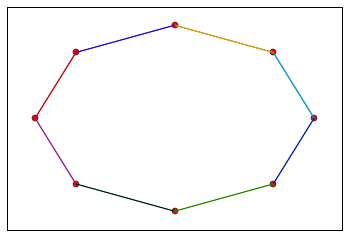

In [3]:
x = Bidirectional_Ring(8)
x.draw()

In [4]:
x.state()

[('P4', {'n': 8}),
 ('P3', {'n': 8}),
 ('P6', {'n': 8}),
 ('P2', {'n': 8}),
 ('P5', {'n': 8}),
 ('P7', {'n': 8}),
 ('P0', {'n': 8}),
 ('P1', {'n': 8})]

#### Line Network

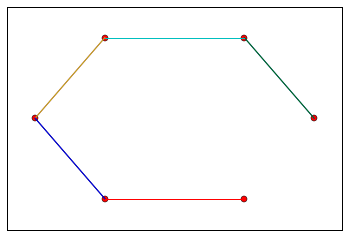

In [5]:
Bidirectional_Line(6).draw()

#### Random Line Network

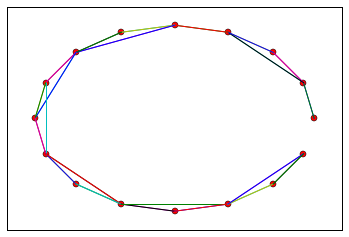

In [6]:
Random_Line_Network(16).draw()

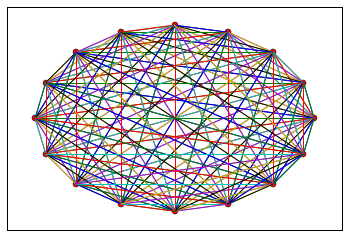

In [7]:
Random_Line_Network(16, sparsity=0).draw()

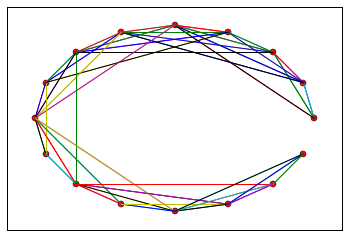

In [8]:
Random_Line_Network(16, sparsity=0.5).draw()

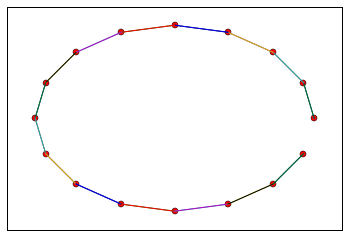

In [9]:
Random_Line_Network(16, sparsity=float('inf')).draw()

### Algorithms

#### A Basic Algorithm: LCR

In [10]:
x = Unidirectional_Ring(5)

##### Initial Network State

In [11]:
x.state()

[('P2', {'n': 5}),
 ('P1', {'n': 5}),
 ('P3', {'n': 5}),
 ('P0', {'n': 5}),
 ('P4', {'n': 5})]

In [12]:
lcr = LCR(x)

--------------
Running LCR on
[P2 -> {P1}, P1 -> {P3}, P3 -> {P0}, P0 -> {P4}, P4 -> {P2}]
Round 1
P2.status is non-leader
P1.status is non-leader
P0.status is non-leader
Round 2
P1.status is non-leader
Round 3
P3.status is non-leader
Round 4
P0.status is non-leader
Round 5
P4.status is leader
LCR Terminated
Message Complexity: 11
Time Complexity: 5
------------------


##### Time Complexity

In [13]:
print lcr.r, "rounds"

5 rounds


##### Message Complexity

In [14]:
print lcr.message_count, "messages"

11 messages


##### Final Network State

In [15]:
x.state()

[('P2', {'n': 5, 'status': 'non-leader'}),
 ('P1', {'n': 5, 'status': 'non-leader'}),
 ('P3', {'n': 5, 'status': 'non-leader'}),
 ('P0', {'n': 5, 'status': 'non-leader'}),
 ('P4', {'n': 5, 'status': 'leader'})]

#### Chaining Algorithms

In [16]:
x = Random_Line_Network(6)

In [17]:
#Elect a Leader
FloodMax(x, params={'verbosity': Algorithm.QUIET})

FloodMax Terminated
Message Complexity: 70
Time Complexity: 6
------------------


<datk.core.algs.FloodMax instance at 0x10c8e9368>

In [18]:
#Construct a BFS tree rooted at the Leader 
SynchBFS(x)

-------------------
Running SynchBFS on
[P1 -> {P2}, P2 -> {P1, P0}, P0 -> {P2, P5, P4}, P5 -> {P0, P4, P3}, P4 -> {P0, P5, P3}, P3 -> {P5, P4}]
Round 1
P5.parent is None
P0.parent is P5
P4.parent is P5
P3.parent is P5
Round 2
P2.parent is P0
Round 3
P1.parent is P2
Round 4
SynchBFS Terminated
Message Complexity: 14
Time Complexity: 4
------------------


<datk.core.algs.SynchBFS instance at 0x10c8f9758>

--------------------------
Running _ConvergeHeight on


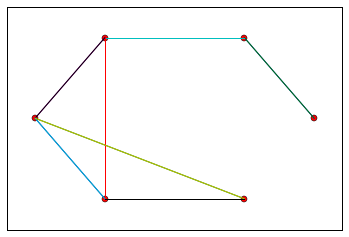

[P1 -> {P2}, P2 -> {P1, P0}, P0 -> {P2, P5, P4}, P5 -> {P0, P4, P3}, P4 -> {P0, P5, P3}, P3 -> {P5, P4}]
Round 1
Round 2
Round 3
Round 4
P5.height is 3
_ConvergeHeight Terminated
Message Complexity: 8
Time Complexity: 4
------------------


<datk.core.algs._ConvergeHeight instance at 0x10d6b7ab8>

In [19]:
SynchConvergeHeight(x, params={'draw':True})

In [20]:
x.state()

[('P1', {'n': 6, 'parent': P2 -> {P1, P0}, 'status': 'non-leader'}),
 ('P2', {'n': 6, 'parent': P0 -> {P2, P5, P4}, 'status': 'non-leader'}),
 ('P0', {'n': 6, 'parent': P5 -> {P0, P4, P3}, 'status': 'non-leader'}),
 ('P5', {'height': 3, 'n': 6, 'parent': None, 'status': 'leader'}),
 ('P4', {'n': 6, 'parent': P5 -> {P0, P4, P3}, 'status': 'non-leader'}),
 ('P3', {'n': 6, 'parent': P5 -> {P0, P4, P3}, 'status': 'non-leader'})]

#### Equivalently, chain them like this:

In [21]:
x = Random_Line_Network(6)
A = Chain(FloodMax(), Chain(SynchBFS(), SynchConvergeHeight()), params={'verbosity':Algorithm.QUIET})
A(x)

FloodMax Terminated
Message Complexity: 70
Time Complexity: 6
------------------
SynchBFS Terminated
Message Complexity: 14
Time Complexity: 4
------------------
_ConvergeHeight Terminated
Message Complexity: 8
Time Complexity: 4
------------------


In [22]:
x.state()

[('P1', {'n': 6, 'parent': P0 -> {P1, P2, P3}, 'status': 'non-leader'}),
 ('P2', {'n': 6, 'parent': P0 -> {P1, P2, P3}, 'status': 'non-leader'}),
 ('P0', {'n': 6, 'parent': P3 -> {P0, P5, P4}, 'status': 'non-leader'}),
 ('P3', {'n': 6, 'parent': P5 -> {P3, P4}, 'status': 'non-leader'}),
 ('P5', {'height': 3, 'n': 6, 'parent': None, 'status': 'leader'}),
 ('P4', {'n': 6, 'parent': P5 -> {P3, P4}, 'status': 'non-leader'})]

### Benchmarking Algorithms

Sampling n = ... 2... , 4... , 8... , 16... , 32... , 64... , 128... , 256...  DONE


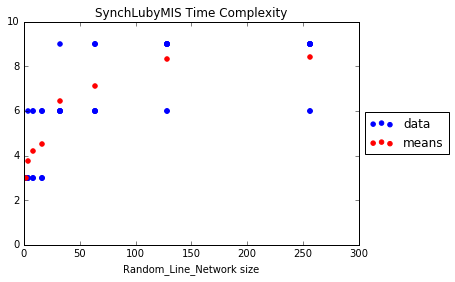

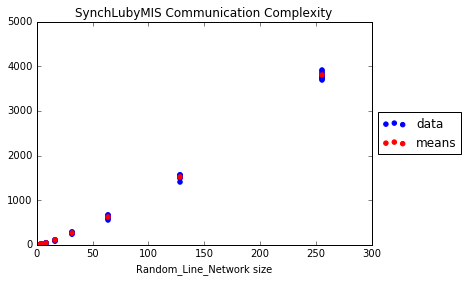

In [23]:
benchmark(SynchLubyMIS, Random_Line_Network, testLubyMIS)

Sampling n = ... 2... , 4... , 8... , 16... , 32... , 64... , 128... , 256...  DONE


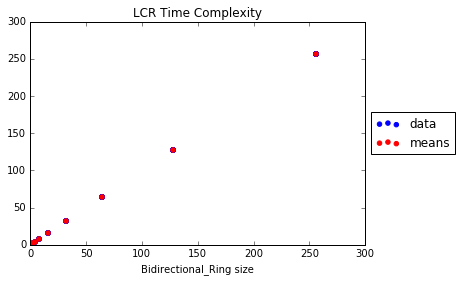

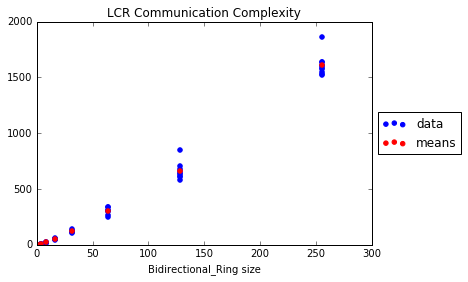

In [24]:
benchmark(LCR, Bidirectional_Ring, testLeaderElection)